In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import softmax
from scipy.stats import norm

In [5]:
data = np.genfromtxt('../../notebooks/cancer_2_R2 train 0.914 test 0.940.csv', delimiter=',')
preds = data[1:2,:].T
sigmas = data[2:3,:].T
trues = data[0:1,:].T
x = data[3:4,:].T

In [6]:
p = np.random.permutation(len(preds))
preds = preds[p]
sigmas = sigmas[p]
trues = trues[p]
x = x[p]

In [7]:
pred_cal = preds[:100]
pred_test = preds[100:]
var_cal = sigmas[:100]
var_test = sigmas[100:]
true_cal = trues[:100]
true_test = trues[100:]
x_cal = x[:100]
x_test = x[100:]

In [8]:
# Fake data - expected format!
#n_cal = 1000
#n_test = 500
#pred_cal = 5*np.random.rand(n_cal,1)
#sigma_cal = np.random.rand(n_cal,1)
#pred_test = np.random.rand(n_test,1)
#sigma_test = np.random.rand(n_test,1)
#
#true_cal = np.random.rand(n_cal,1)
#true_test = np.random.rand(n_test,1)

In [9]:
n_cal, n_classes = pred_cal.shape 
n_test = true_test.shape[0]
print(f'{n_cal} calibration points')
print(f'{n_test} test points')
print(f'{n_classes} classes')

100 calibration points
50 test points
1 classes


In [10]:
# scores
sigma_cal = np.sqrt(var_cal)
sigma_test = np.sqrt(var_test)
cal_scores = np.abs(pred_cal-true_cal)/sigma_cal
test_scores = np.abs(pred_test-true_test)/sigma_test

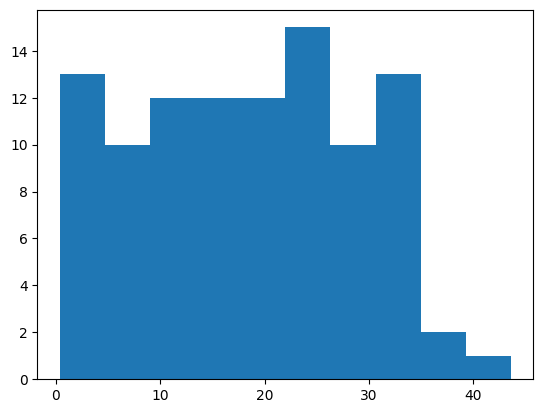

In [11]:
plt.hist(cal_scores);

Coverage:0.96
Avg width: 503.2227047446579


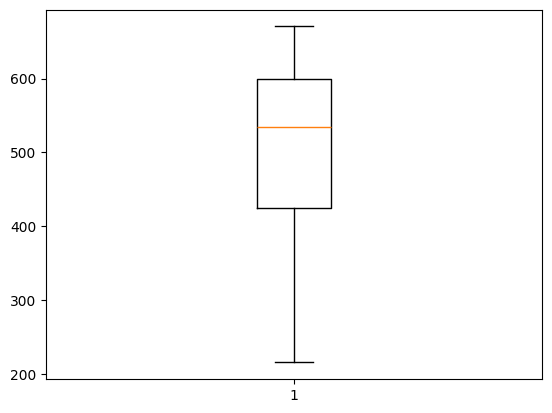

In [12]:
alpha = 0.1
q_level = np.ceil((n_cal+1)*(1-alpha))/n_cal
qhat = np.quantile(cal_scores, q_level, method = 'higher') # check quantile method

# test predictions
test_intervals = np.zeros((n_test,2))
test_intervals[:,0:1] = pred_test-qhat*sigma_test
test_intervals[:,1:] = pred_test+qhat*sigma_test

coverage = ((true_test<=test_intervals[:,1:]) & (true_test>=test_intervals[:,0:1])).sum()/n_test

print(f'Coverage:{coverage}')
widths = test_intervals[:,1]-test_intervals[:,0]
avg_width = widths.mean()

plt.boxplot(widths)
print(f'Avg width: {avg_width}')

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame({'x':x_test[:,0],
                   'lower': test_intervals[:,0],
                   'upper':test_intervals[:,1]})

In [15]:
df.sort_values(by = 'x', inplace = True)

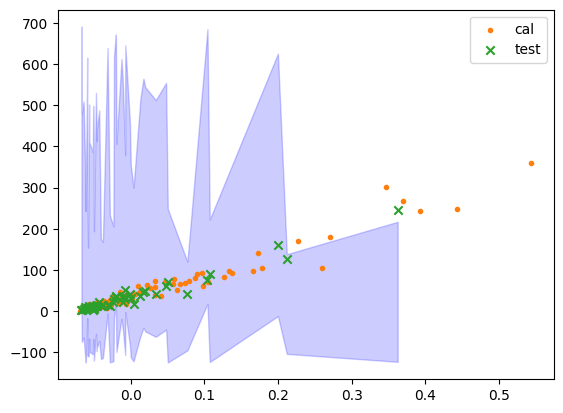

In [16]:
#plt.plot(x_test, pred_test, color='C0', label="predicted mean")

plt.fill_between(df['x'],
                df['lower'],
                df['upper'],
                alpha=0.2, color='blue')
   
# Plot the truth
plt.scatter(x_cal, true_cal, marker='.', color='C1', label='cal')
plt.scatter(x_test, true_test, marker='x', color='C2', label='test')
plt.legend()
#plt.set_ylim(-10, 370)
#plt.set_xlim(None, t[-1])

In [17]:
test_intervals = np.zeros((n_test,2))
test_intervals[:,0:1] = pred_test-sigma_test**2
test_intervals[:,1:] = pred_test+sigma_test**2
((true_test<=test_intervals[:,1:]) & (true_test>=test_intervals[:,0:1])).sum()/n_test

0.1